In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from classificationEval import Evaluator
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv(r"C:\Users\huanqing\Desktop\ARIA_Documents\moleculenet-classification-fp\Processed_data\processed_bace.csv")

In [4]:
df.head(2)

,Unnamed: 0,smiles,CID,Class,Model,pIC50,MW,AlogP,HBA,HBD,...,PEOE11 (PEOE11),PEOE12 (PEOE12),PEOE13 (PEOE13),PEOE14 (PEOE14),canvasUID,ecfp4,ap,tt,rdkit,maccs
0,0,O1CC[C@@H](NC(=O)[C@@H](Cc2cc3cc(ccc3nc2N)-c2c...,BACE_1,1,Train,9.154901,431.56979,4.4014,3,2,...,0.00000,7.980170,0.0,0.000000,1,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ...","[1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,1,Fc1cc(cc(F)c1)C[C@H](NC(=O)[C@@H](N1CC[C@](NC(...,BACE_2,1,Train,8.853872,657.81073,2.6412,5,4,...,7.98017,24.148668,0.0,24.663788,2,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...","[1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, ...","[1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [14]:
df.size

909313

In [5]:
fp_colname = "ap"
class_colname = "Class"

In [6]:
# Stratified Splitting into train, test, val in the ratio of 80:10:10
train_df, temp_df = train_test_split(df, test_size=0.2, stratify=df[class_colname], random_state=42)

# Then split temp into 10% val and 10% test
val_df, test_df = train_test_split(temp_df, test_size=0.5, stratify=temp_df[class_colname], random_state=42)

In [13]:
val_df.size

90751

In [11]:
test_df.size

91352

In [12]:
train_df.size

727210

In [22]:
train_class_counts = train_df.groupby("Class").apply(lambda df: df.index.nunique())
val_class_counts = val_df.groupby("Class").apply(lambda df: df.index.nunique())
test_class_counts = test_df.groupby("Class").apply(lambda df: df.index.nunique())

C:\Users\huanqing\AppData\Local\Temp\ipykernel_3144\2238374495.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  train_class_counts = train_df.groupby("Class").apply(lambda df: df.index.nunique())
C:\Users\huanqing\AppData\Local\Temp\ipykernel_3144\2238374495.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  val_class_counts = val_df.groupby("Class").apply(lambda df: df.index.nunique())
C:\Users\huanqin

In [25]:
def plot_bar(data):
        # Create bar plot
    ax = data.plot(kind='bar', color='skyblue', edgecolor='black')

    # Add labels on top of bars
    for i, value in enumerate(data):
        ax.text(i, value + 0.1, str(value), ha='center', va='bottom', fontsize=10)

    # Add titles and labels
    plt.title("Unique Index Counts per Class")
    plt.xlabel("Class")
    plt.ylabel("Unique Index Count")
    plt.xticks(rotation=0)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

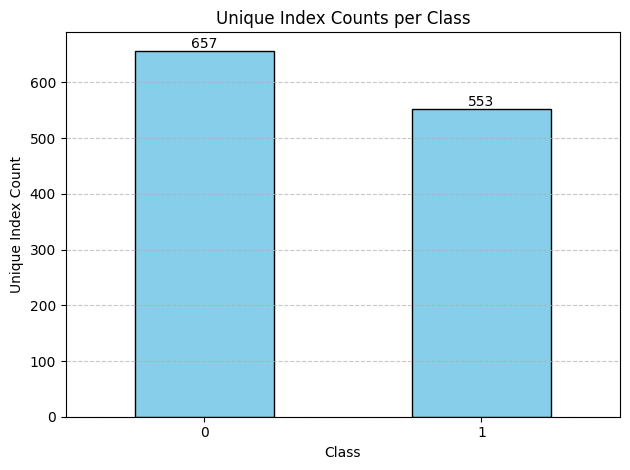

In [26]:
plot_bar(train_class_counts)

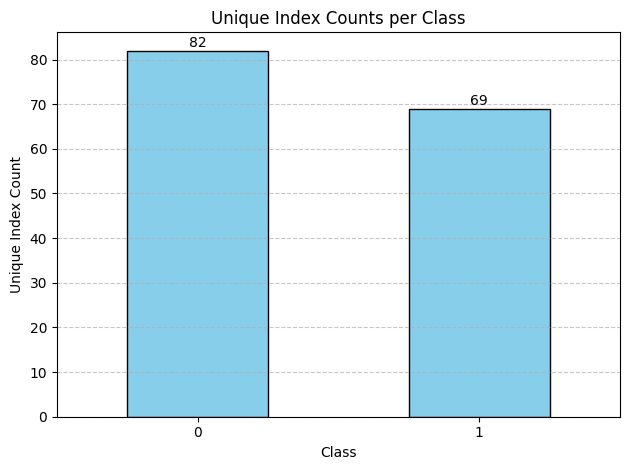

In [27]:
plot_bar(val_class_counts)

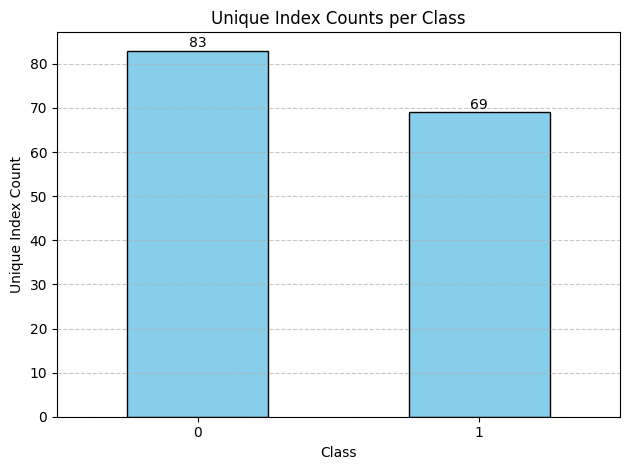

In [28]:
plot_bar(test_class_counts)

In [ ]:
evaluator = Evaluator(train_df, test_df, val_df,
                    epochs=50,
                    fp_colname=fp_colname,
                    class_colname=class_colname)

results = evaluator.test()

In [29]:
results

{'f1_val': 0.8108108108108109,
 'auc_val': np.float64(0.8919229409685401),
 'f1_test': 0.7727272727272727,
 'auc_test': np.float64(0.894534660380653)}